In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# returns a dataframe with the frequency of digits 0-9 from given list of nums
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#returns the first digit after the decimal point
def first_after_decimal(num):
    if pd.isna(num):
        return
    if num == 0:
        return
    else:
        num = int(num)
        return(first_digit(abs(num)))
#     return(first_digit(abs(num)))
#     return int((abs(float(num)) * 10) % 10)

In [2]:
def first_digit(num):
    if pd.isna(num):
        return
    v = str(num)[0]
    if v == '.':
        return
#     print(int(str(num)))
    return int(str(num)[0])

In [3]:
all_files = ["Drivingdata_cols.csv"] # "Data/5.csv","Data/28.csv","Data/35.csv","Data/53.csv",

#  "Data/71.csv", "Data/1.csv", "Data/14.csv", "Data/19_SHORT.csv", "Data/22.csv",
#             "Data/25.csv", "Data/32_LETTER.csv", "Data/34.csv", "Data/36.csv",
#             "Data/42.csv", "Data/43.csv", "Data/47.csv", "Data/48.csv", "Data/49.csv", "Data/50.csv",
#             "Data/51.csv", "Data/54.csv", "Data/56.csv", "Data/59.csv",
#             "Data/63.csv", "Data/67.csv", "Data/68.csv",
#             "Data/70.csv", "Data/72.csv", "Data/76.csv", "Data/79.csv",
#             "Data/80.csv", "Data/82.csv", "Data/91.csv"

In [7]:
df2 = pd.DataFrame(index=range(0, 10))

i = 1
std_devs = {}

for file in all_files:
    print(i)
    i += 1
    data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
    last_digits = [] #
    last_digit_dict = {}
    last_digit_freq = {}

    for column in data:
        nums = data[column]
        last_digit = [first_after_decimal(num) for num in nums]
        #last_digit = [first_digit(num) for num in nums]
        last_digits += last_digit
        last_digit_dict[column] = last_digit
        

    df1 = get_frequencies(last_digits)
    
    column_data = {}
    keys = []
    tags = []

    for key in last_digit_dict.keys():
        frequencies = get_frequencies(last_digit_dict[key])
        frequencies['Percentage'] = frequencies['freq'] / sum(frequencies['freq']) * 100
        last_digit_freq[key] = frequencies

        message = (f"{key}"
        f"{frequencies}"
        f"")
        #print(message)
        
        column_data[key] = frequencies['Percentage']
        keys.append(key)
        
        prevTag = "Previous"
        updateTag = "Update"
        
        if prevTag in key:
            tags.append(prevTag)
            
        elif updateTag in key:
            tags.append(updateTag)
 
    
    df5 = pd.DataFrame(column_data)
    #df5['Average'] = df1['freq'] / sum(df1['freq']) * 100
    print(df5)
#     df5 = df5.drop([0])
    
    std_devs[file] = df5.std(axis = 1)
    print(tags)
    
# print(std_devs)
# df7 = pd.DataFrame(std_devs)
# print(df7)
        
    df1['Percentage'] = df1['freq'] / sum(df1['freq']) * 100
    df2[file] = df1['freq'] / sum(df1['freq']) * 100
    print(df2)


#         df1.columns = ['Element', 'Frequency']
#     df1['Percentage'] = df1['Frequency'] / sum(df1['Frequency']) * 100
#     if first:
#         df2 = df1[['Element', 'Percentage']].copy()
#         df2.rename(columns={'Percentage': file}, inplace=True)
#         first = False
#     else:
#         df2[file] = df1['Frequency'] / sum(df1['Frequency']) * 100

1
   Odom Reading 1 (Previous)  Odom Reading 1 (Update)  \
0                   0.000000                 0.000000   
1                  30.700770                36.558422   
2                  10.934111                 9.260083   
3                  10.044125                 7.169336   
4                   9.109266                 8.274021   
5                   9.685139                 7.740214   
6                   8.451126                 8.459371   
7                   7.837858                 7.970047   
8                   6.940393                 7.643832   
9                   6.297210                 6.924674   

   Odom Reading 2 (Previous)  Odom Reading 2 (Update)  \
0                   0.000000                 0.000000   
1                  31.698181                36.466631   
2                  11.398502                 9.842450   
3                   9.703889                 6.779961   
4                   8.223332                 8.302354   
5                   9.471994

                      level_0  Digit  percentage
0   Odom Reading 1 (Previous)      0    0.000000
1   Odom Reading 1 (Previous)      1   30.700770
2   Odom Reading 1 (Previous)      2   10.934111
3   Odom Reading 1 (Previous)      3   10.044125
4   Odom Reading 1 (Previous)      4    9.109266
..                        ...    ...         ...
75    Odom Reading 4 (Update)      5    3.363914
76    Odom Reading 4 (Update)      6    3.669725
77    Odom Reading 4 (Update)      7    5.504587
78    Odom Reading 4 (Update)      8    5.504587
79    Odom Reading 4 (Update)      9    6.422018

[80 rows x 3 columns]


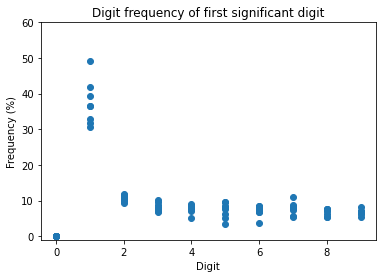

In [9]:
df6 = pd.DataFrame(df5).T.stack().reset_index()#.drop(columns=['level_1'])
df6 = df6.rename(columns={0: "percentage", "level_1": "Digit"})
print(df6)

plt.scatter(x = 'Digit', y = 'percentage', data = df6)
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim(-1, 60)
plt.ylabel("Frequency (%)")
plt.xlabel("Digit")
plt.title("Digit frequency of first significant digit")
plt.savefig('mileage_first_digit', dpi=300)
plt.show()

In [76]:
df6 = df6.astype({'Digit': str})

df6 = pd.pivot_table(df6, values = 'percentage', index = 'level_0', columns = 'Digit').reset_index()
print(df6)

df6['Target'] = tags
print(df6)

Digit                    level_0    0          1          2          3  \
0      Odom Reading 1 (Previous)  0.0  30.700770  10.934111  10.044125   
1        Odom Reading 1 (Update)  0.0  36.558422   9.260083   7.169336   
2      Odom Reading 2 (Previous)  0.0  31.698181  11.398502   9.703889   
3        Odom Reading 2 (Update)  0.0  36.466631   9.842450   6.779961   
4      Odom Reading 3 (Previous)  0.0  32.990506  11.946203   8.860759   
5        Odom Reading 3 (Update)  0.0  41.738449  11.667972   7.517619   
6      Odom Reading 4 (Previous)  0.0  39.384615  10.461538   8.307692   
7        Odom Reading 4 (Update)  0.0  49.235474  10.397554   7.645260   

Digit         4         5         6          7         8         9  
0      9.109266  9.685139  8.451126   7.837858  6.940393  6.297210  
1      8.274021  7.740214  8.459371   7.970047  7.643832  6.924674  
2      8.223332  9.471994  7.777381   8.829825  7.599001  5.297895  
3      8.302354  8.479377  8.302354   7.452646  7.452646 

In [77]:
# plt.boxplot(df7, sym="k.", medianprops=dict(color="black"))
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
# plt.ylim(-1, 40)
# plt.ylabel("Standard Deviation")
# plt.xlabel("Digit")
# plt.title("Standard deviation of digit frequency of first significant digit")
# plt.savefig('Data/fig1a', dpi=300)
# plt.show()

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
print(features)

# Separating out the features
x = df6.loc[:, features].values
# # Separating out the target
y = df6.loc[:,['Target']].values
# # # Standardizing the features

x = StandardScaler().fit_transform(x)
print(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df6[['Target']]], axis = 1)
print(finalDf)

['1', '2', '3', '4', '5', '6', '7', '8', '9']
[[-1.16301341  0.22622976  1.60634877  1.2046571   1.1634221   0.86191384
   0.0124104   0.17569021 -0.61588005]
 [-0.13793511 -1.71034061 -0.97270651  0.43990501  0.21157777  0.86750098
   0.09199226  0.9785818   0.18957848]
 [-0.98846846  0.76345182  1.30111282  0.39349386  1.05910911  0.40539786
   0.60960345  0.9274131  -1.89867519]
 [-0.15399837 -1.0366395  -1.32202555  0.4658468   0.57332339  0.76110938
  -0.21949815  0.76036662  0.18560584]
 [-0.76231383  1.39705014  0.54471772 -0.54405075  0.41150727 -0.20067763
   0.24719575  0.83247491  1.86242962]
 [ 0.76856011  1.07518375 -0.66025132 -0.03755984 -0.47222099 -0.24815488
  -1.31183891 -1.48935303  0.34759161]
 [ 0.35664348 -0.32045774  0.04854547 -2.34650319 -1.01654111 -0.06921908
   1.96242169 -0.72206057  0.38501696]
 [ 2.08052559 -0.39447762 -0.54574139  0.42421102 -1.93017754 -2.37787048
  -1.39228649 -1.46311304 -0.45566729]]
   principal component 1  principal component 2  

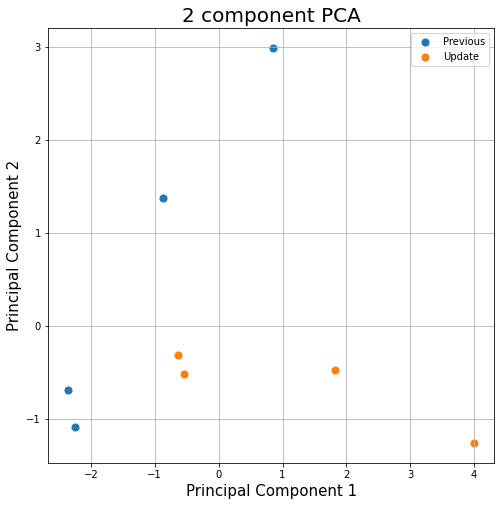

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [prevTag, updateTag]
for target in targets:
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

fig.savefig('mileage_first_digit_PCA', dpi=300)